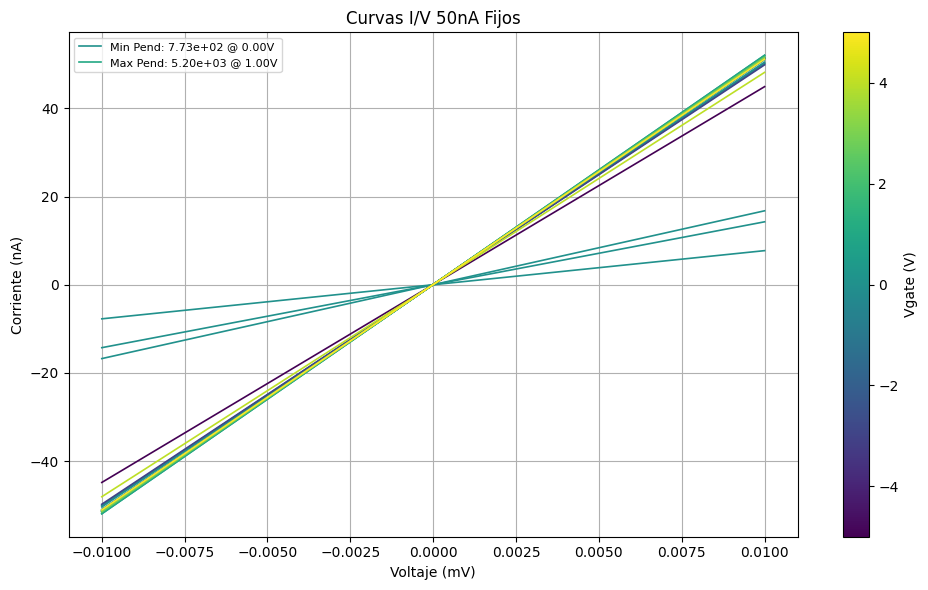

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# CARGA DEL CSV
# ==============================
file_name = "50nARegreciones+Vgate.csv"
df = pd.read_csv(file_name, sep=";")

# Asegurar que la columna de Vgate es numérica
df["Vgate(V)"] = pd.to_numeric(df["Vgate(V)"], errors="coerce")

# Extraemos columnas útiles
pendientes = df["Pendiente"].values
interceptos = df["Intercepto"].values
vgates = df["Vgate(V)"].values

# ==============================
# CONFIGURACIÓN
# ==============================
x_range = np.linspace(-0.01, 0.01, 200)
cmap = plt.cm.viridis

# =====================================================
# 1) GRÁFICA DE TODAS LAS RECTAS COLOREADAS POR VGATE
# =====================================================
plt.figure(figsize=(10, 6))

# Normalizamos colores según Vgate
norm = plt.Normalize(vgates.min(), vgates.max())

# Identificar 3 rectas representativas
idx_max = np.argmax(pendientes)
idx_min = np.argmin(pendientes)
idx_zero = np.argmin(np.abs(pendientes))

for i, (m, b, vg) in enumerate(zip(pendientes, interceptos, vgates)):
    y_vals = m * x_range + b
    color = cmap(norm(vg))

    # Etiquetar solo las 3 curvas elegidas
    if i == idx_max:
        label = f"Max Pend: {m:.2e} @ {vg:.2f}V"
    elif i == idx_min:
        label = f"Min Pend: {m:.2e} @ {vg:.2f}V"
    elif i == idx_zero:
        label = f"~0 Pend: {m:.2e} @ {vg:.2f}V"
    else:
        label = None

    plt.plot(x_range, y_vals, color=color, linewidth=1.2, label=label)

# Crear colorbar correctamente
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
plt.colorbar(sm, ax=plt.gca(), label="Vgate (V)")

plt.xlabel("Voltaje (mV)")
plt.ylabel(r"Corriente (nA)")
plt.title("Curvas I/V 50nA Fijos")
plt.grid(True)
plt.legend(loc="best", fontsize=8)
plt.tight_layout()

plt.savefig("rectas_por_Vgate.png", dpi=300)
plt.show()
